[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tamaragerber/climate_archives/blob/main/ice-stratigraphy_exercise.ipynb)


# Glaciers and ice sheets as climate archives - Ice-sheet stratigraphy


In [1]:
# Install ipympl so that we can use interactive plots
!pip install ipympl
# And activate
from google.colab import output
output.enable_custom_widget_manager()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.8/515.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 34.6 MB/s eta 0:00:00


**Important!** If this is the first time you are running the Notebook, restart your session now using the menu 'Runtime... Restart session'. You don't need to run the above cell again afterwards, you can continue with the rest of the Notebook.



In [2]:
# --- file download ---
import requests
import os
files = {'EGRIP_timescale.csv': 'https://unils-my.sharepoint.com/:x:/g/personal/tamara_gerber_unil_ch/IQDnsEb__CS8RKtWEA3IU4_ZAZNQdJVPLVPL7H2z6Jl3o68?download=1',
         'greenland_flowline.csv': 'https://unils-my.sharepoint.com/:x:/g/personal/tamara_gerber_unil_ch/IQDWyGVKQydKQIm3fq_1ARvMAWp8YmhfM1WU5002ZCeIC1Q?download=1'
}

for f in files:
    print('Downloading...')
    response = requests.get(files[f])
    open(f, 'wb').write(response.content)
print('Done.')



Downloading...
Downloading...
Done.


Ice cores preserve detailed records of past climate because the isotopic and chemical composition of snowfall remains largely unchanged once it is buried and transformed into glacier ice. To interpret these records we need to know the age of the ice. Establishing a reliable relationship between depth and time (ice-core timescales) is therefore essential.

As layers of snow are buried, they are gradually compressed and carried downward by the flow of the ice. During this process, layers thin vertically and stretch horizontally under the weight of the overlying ice. Consequently, the age of the ice does not increase linearly with depth, since annual layers become progressively thinner with depth. This relationship between depth and age can be described using theoretical flow and accumulation models.

Let's consider the following parameters:

- $H$ = ice thickness  
- $\dot{b}$ = accumulation rate (m/yr of ice)  
- $z$ = elevation above bed  
- $z(a)$ = elevation of a layer with age $a$
- $\lambda(a)$ = current thickness of a layer (isochrone) with age $a$   
- $t$ = time, where $t = 0$ is present day and $t = -a$ is the time at which a layer of age $a$ was deposited  


<p align="center">
<img src="attachment:cb1ae39d-7b6b-4f8e-9fb8-f200bd749b3e.png" width="75%">
</p>


A layer moves downward with the vertical velocity $w(z)$ and, assuming the layers remain horizontal, the thinning rate is:
$$\frac{d\lambda}{dt}= \dot{\epsilon}_{zz}\lambda,$$
whereby the vertical strain rate $$\dot{\epsilon}_{zz} = \frac{\partial w}{\partial z}$$ varies with time and depth as the layer moves.

By integrating the above equation from initial ($\lambda_0 = \dot{b}$) to present thickness ($\lambda(a)$), and from age $-a$ to present day, we can obtain an expression for the annual layer thickness:
<details>
$$ \int_{\dot{b}}^{\lambda(a)} \frac{1}{\lambda}d\lambda = \int_{-a}^{0}\dot{\epsilon_{zz}}dt$$

$$\ln\left(\frac{\lambda(a)}{\dot{b}}\right) = \int_{-a}^0\dot{\epsilon_{zz}}dt$$

</details>

$$\lambda(a) = \dot{b}\exp\left(\int_{-a}^0\dot{\epsilon_{zz}}dt\right)$$

The depth of a certain age layer equals the sum of the thicknesses of the overlying, younger layers. In other words, the depth of a layer of given age depends on the subsequent accumulation, integrated over time, and the cumulative strain of those layers. To apply these equations, we need an ice-flow model that provides the strain rates or vertical velocities.


---
### Nye model

In a very simple model (Nye 1963) we can make two assumptions: 1) the vertical strain rate along any vertical line in the ice is uniform at any time and 2) there is no melting at the base of the ice sheet. This means that the vertical velocity $w$ at the surface ($z=H$) corresponds to the negative accumulation rate $\dot{b}$, and is zero at the bed ($z=0$).

It follows
$$\frac{dw}{dz} = -\frac{\dot{b}}{H}, $$

and
$$ w(z) = -\frac{\dot{b}z}{H}.$$

Then, the expression for the annual layer thickness becomes
$$\boxed{ \lambda(a) = \dot{b}\exp\left(\frac{-\dot{b}a}{H}\right) }$$

---
### Exercise 1)

Plot the relationship between annual layer thickness and age using the above equations. What is the thickness of an annual layer deposited 9000 years ago, assuming that the climate was constant in time, the accumulation rate is 20 cm ice equivalent per year, and the ice thickness is 2500 m?

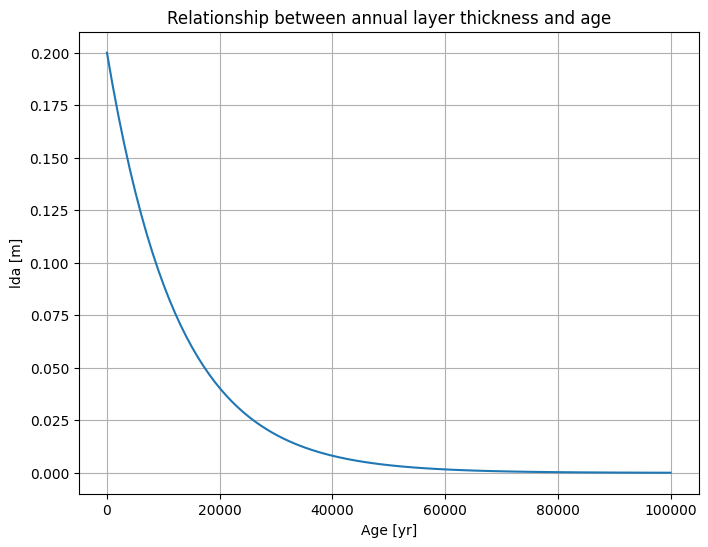

Annual layer thickness: 0.09735045119199434


In [9]:
import numpy as np
import matplotlib.pyplot as plt

a   = 9000                     # age
b   = 0.20                     # accumulation rate
H   =  2500                    # ice thickness
lda = b * np.exp(-b * a / H)   # annual layer thickness, using equation above


# --- plot the annual layer thickness vs age. ---
age = np.linspace(0, 100000, 100)
lda_age = b * np.exp(-b * age / H)

plt.figure(figsize=(8,6))
plt.plot(age, lda_age)
plt.xlabel("Age [yr]")
plt.ylabel("lda [m]")
plt.title("Relationship between annual layer thickness and age")
plt.grid()
plt.show()


# --- calculate layer thickness for a=9000 years. ---
lda = b * np.exp(-b * a / H)
print(f"Annual layer thickness: {lda}")


### *Solution Exercise 1):*

*What is the thickness of an annual layer deposited 9000 years ago, assuming that the climate was constant in time, the accumulation rate is 20 cm ice equivalent per year, and the ice thickness is 2500 m?*

The annual layer thickness deposited 9000 years ago is 0.10 m.



---
## Depth-age relationship

The depth of a certain layer equals the sum of the thicknesses of the overlying younger layers. From the Nye model above, we can derive an expression for this depth-age relationship by integrating over layer thicknesses:
<details>
$$d(a)= \int_0^a \lambda(a')da'= \int_0^a \dot{b}\exp\left(-\frac{\dot{b}a'}{H}\right)da'$$

With integral substitution $u = -\frac{\dot{b}a'}{H} \Longrightarrow du = -\frac{\dot{b}}{H}da' \Longrightarrow da' = -\frac{H}{\dot{b}}du$, the above integral becomes:

$$ d(a) = \dot{b}\int_{u=0}^{u=-\dot{b}a/H}\exp(u)\left(-\frac{H}{\dot{b}}\right)du$$

$$d(a) = -H \int_0^{-\dot{b}a/H}\exp(u)du$$

$$d(a) = -H\left(\exp\left(-\frac{\dot{b}a}{H}\right)-1\right)$$
which can be simplified to
</details>
$$\boxed{d(a) = H\left(1-\exp\left(-\frac{\dot{b}a}{H}\right)\right)}.$$

This equation can be re-arranged to express age as a function of depth:

$$\boxed{ a(d) = -\frac{H}{\dot{b}}\ln\left({1-\frac{d}{H}}\right)}.$$


### Exercise 2)

I am interested in drilling an ice core on a small ice cap. The ice thickness is 900 m, the accumulation rate is 12 cm/yr ice equivalent.

a) Assuming that changes in the accumulation rate over time are negligible, at what depth can I expect to find ice from the most recent glacial period (>11000 years ago) according to the Nye model?

b) In a radargram you can identify intact stratigraphy until 150 m above the bed. What is the oldest ice you expect to find with intact stratigraphy?

c) My measurement technique for ice impurities has a depth resolution of 1 cm. Will I be able to resolve annual layers in this deepest part?

In [11]:
# --- solution exercise 2 ---

a = 11000  #age
H = 900    #ice thickness
b = 0.12   #accumulation rate

d = 150    #depth

# --- at what depth do I find ice from last glacial period? ---
d_ice = H*(1-np.exp(-((b*a)/H)))
print(f"Depth of ice from last glacial period: {d_ice}")

# --- max age of intact stratigraphy ---
max_age = -(H/b)*np.log(1-750/H)
print(f"Maximum age of intact stratigraphy: {max_age}")

# --- can i resolve annual layers 150 m above the bed? ---
lda_150 = b * np.exp(-b * max_age / H)
print(f"Annual thickness layer 150 m above the bed: {lda_150}")

Depth of ice from last glacial period: 692.3761359705335
Maximum age of intact stratigraphy: 13438.196019210414
Annual thickness layer 150 m above the bed: 0.019999999999999993


### *Solution Exercise 2):*

2a) *Assuming that changes in the accumulation rate over time are negligible, at what depth can I expect to find ice from the most recent glacial period (>11000 years ago) according to the Nye model?*

According to the Nye model, assuming that changes in the accumulation rate over time are negligible, it is possible to find ice from the most recent glacial period (>11000 years ago) at a depth of 692.38 m.

2b) *In a radargram you can identify intact stratigraphy until 150 m above the bed. What is the oldest ice you expect to find with intact stratigraphy?*

The oldest ice which is possible to find with intact stratigraphy has 13438.20 years.

2c) *My measurement technique for ice impurities has a depth resolution of 1 cm. Will I be able to resolve annual layers in this deepest part?*

Yes, the annual layers 150 m above the bed can be resolved. The calculated thickness of the annual layer is in fact 0.02 m (or 2 cm), which is greater than the measurement resolution of 1 cm.



---
### Exercise 3)

The file `EGRIP_timescale.csv` provides the age–depth scale for the EastGRIP ice core. Estimate the past accumulation rates assuming no ice flow, a constant ice thickness of 2665 m, and zero basal melt. Plot the annual layer thickness as a function of depth and the inferred accumulation rate as a function of time, and briefly describe your observations.

Hint: The annual layer thickness can also be inferred from the depth-age relationship $\lambda = \frac{\Delta_{depth}}{\Delta_{age}}$. In Python, you can calculate this type of ratio using the gradient function: $\frac{\Delta_{x}}{\Delta_{y}} = $ `np.gradient(x,y)`.

Alternatively, the annual layer thickness can also be expressed as a function of depth:
$$\lambda(d) = \dot{b} (1-\frac{d}{H})$$



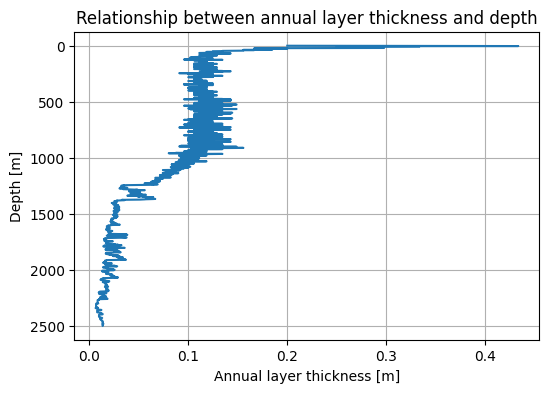

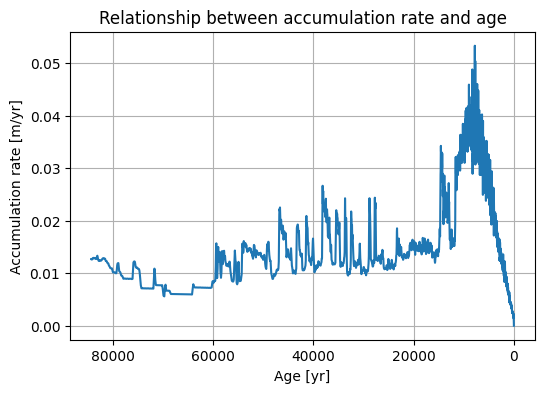

In [5]:
# --- solution exercise 3 ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load the data ---
df = pd.read_csv("EGRIP_timescale.csv")  # columns: 'depth', 'age'
depth = df['depth'].values  # in meters
age = df['age'].values      # in years

H = 2664                        # ice thickness in m

# --- annual layer thickness: ---
annual_layer_thickness = np.gradient(depth, age)

# --- plot annual layer thickness vs depth ---
plt.figure(figsize=(6,4))
plt.plot(annual_layer_thickness, depth)
plt.gca().invert_yaxis()
plt.ylabel("Depth [m]")
plt.xlabel("Annual layer thickness [m]")
plt.title("Relationship between annual layer thickness and depth")
plt.grid()
plt.show()

# --- calculate past accumulation rate ---
past_acc_rate = annual_layer_thickness * depth / H

# --- Plot accumulation rate vs age ---
plt.figure(figsize=(6,4))
plt.plot(age, past_acc_rate)
plt.gca().invert_xaxis()
plt.xlabel("Age [yr]")
plt.ylabel("Accumulation rate [m/yr]")
plt.title("Relationship between accumulation rate and age")
plt.grid()
plt.show()


### *Solution Exercise 3)*

*Describe plots above.*

The graphs above illustrate the relationship between annual layer thickness and depth (Graph 1) and between accumulation rate and time (Graph 2).
Graph 1 highlights a significant difference in annual layer thickness between the surface and deeper layers, with surface layers reaching thicknesses ranging from 0.2 to 0.4 m. At depths of 50-1000 m, the thickness of the annual layer stabilizes at around 0.125 m, fluctuating approximately between 0.1 and 0.15 m. Between 1000 and 1400 m depth, the thickness of the annual layer exhibits a negative transition phase, reducing the thickness of the annual layer to around 0.02 m at depths between 1500 m and 2500 m.
Graph 2, on the other hand, demonstrates significant fluctuations in the accumulation rate from 80,000 years ago to the present. In fact, more than 8,000 years ago, the accumulation rate was around 0.0125 m/yr, subsequently declining slightly until 65,000 years ago, reaching 0.006 m/yr. From 65,000 years ago, the accumulation rate increased with strong fluctuations around 0.015 m/yr until about 15'000 years ago. Since then, the trend has risen sharply until 15'000 years ago, with a local peak accumulation rate of 0.035 m/yr, before decreasing to previous levels until 13,000 years ago. Over the last 13,000 years, a further increase has been recorded, with a global peak of 0.05 m/yr 10,000 years ago, before decreasing to 0 m/yr today.


---
### Dansgaard-Johnsen model

Up to this point, we have relied on strong simplifications. Now, let’s enrich the model by including additional processes: the basal melt rate $\dot{m}$, basal sliding $u_b$, and a more realistic vertical velocity profile. The Dansgaard–Johnsen model (1969) provides a framework to incorporate these factors, offering a closer representation of real ice flow while still remaining relatively simple and analytically solvable.

The strain-rate variation with depth, and therefore the thinning of layers, depends on the vertical profile of horizontal velocity ($u$) up- and downstream of the potential drill site. The Dansgaard-Johnsen model assumes that the vertical strain rate $\dot{\epsilon}_{zz}$ is constant from the surface to some height $z=h$ above the bed. For larger depths, it linearly decreases to zero at the bed.

The derivation of the model equations is presented below for those interested in the theoretical background.
A detailed understanding of these equations is not necessary for completing the exercise, so you may proceed directly to exercise 4 if you wish.

<details>

The horizontal velocity profile is
$$ u(x,z) = \begin{cases}
u_{sur}(x) & \text{if } h \leq z \leq H \\
u_{sur}(x)\left(f_b +(1-f_b)\frac{z}{h}\right) & \text{if } 0 \leq z \leq h.
\end{cases}$$

The incompressibility of ice states that $\dot{\epsilon}_{xx} + \dot{\epsilon}_{yy} + \dot{\epsilon}_{zz}  = \frac{du}{dx} + \frac{dv}{dy} + \frac{dw}{dz} = 0$. Let's consider a case of parallel flow ($\dot{\epsilon}_{yy} = \frac{dv}{dy} = 0$) and flow-perpendicular compression/extension is negligible. It then follows that $\dot{\epsilon}_{zz} = - \dot{\epsilon}_{xx} = -\frac{du}{dx}$, or
$$w(z) = - \int \frac{du}{dx}dz.$$

When looking at the horizontal velocity definition we can see that only the surface velocity $u_sur$ depends on x. We can thus introduce a term $\alpha = \frac{du_{sur}}{dx}$. Integrating the horizontal velocity gradient then results in the following equations for the vertical velocities:


$$
w(z) =
\begin{cases}
w_{bed} - \alpha\left(f_bz + \frac{z^2}{2h}(1-f_b)\right) & \text{if } 0 \leq z \leq h \\
w_{sur} + \alpha(H-z) & \text{if } h \leq z \leq H,
\end{cases}
$$

whereby the surface and basal velocities are
$$w_{bed} = -\dot{m} + f_b u_{sur}\frac{\partial E_b}{\partial x}$$
$$w_{sur} = -\dot{b} +u_{sur} \frac{\partial E_{s}}{\partial x}.$$

$\frac{\partial E_{s}}{\partial x}$ and $\frac{\partial E_b}{\partial x}$ are the slopes of the surface and bed topography respectively, $\dot{m}$ is the basal melt rate and $\dot{b}$ is the accumulation rate. Since at $z=h$ both vertical velocity equations for ice above and below height $h$ need to match, we can derive a term for $\alpha$:
$$\alpha = \frac{w_{bed}-w_{sur}}{H -\frac{1}{2}(1-f_b)}.$$

</details>

---
### Exercise 4)

The two cells below contain the parameters and equations of the Dansgaard-Johnsen model, as described in "Details" above. The code simulates isochrones, i.e. horizons of uniform age, with depth. By varying the parameters for accumulation rate $\dot{b}$, basal melt rate $\dot{m}$, basal sliding fraction $f_b$ and kink height $h_k$, answer the following questions:

a) Describe and show with an example how accumulation rate, basal melt rate, basal sliding fraction and vertical strain rate profile (kink height) affect the age-depth profile. What is another important control on the isochrone shape?  

b) If you want to drill an ice core with a high temporal resolution, what are the most important parameters to consider when selecting the drill site? What should you consider if you want to recover a record that extends as far back in time as possible? Describe, where in the world you would expect to find such conditions.

c) In the model below, we assume that accumulation rate, basal melt rate, basal sliding fraction, and kink height are constant both along the profile and through time.
In a few sentences, discuss when and where this assumption could be reasonable for establishing a depth–age relationship, and under what conditions it would break down.

d) Ice cores are often drilled on ice divides, where horizontal flow is minimal. Drawing on your discussion in question (c), explain how conditions differ in fast-flowing regions (e.g. at EastGRIP with surface velocities of ~55m/yr) and what consequences this has for interpreting climate-proxy records.


In [6]:

# --- parameters to modify ---
b      = 0.2         # Accumulation rate [m/yr]
m      = 0.04        # Basal melt rate [m/yr]
f_b    = 0.1         # Basal sliding fraction
h_kink = 1000.0      # Kink height in DJ profile [m]

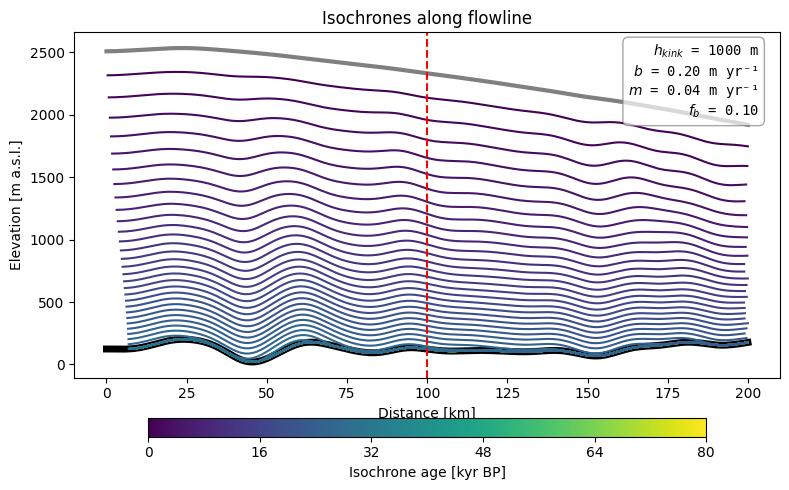

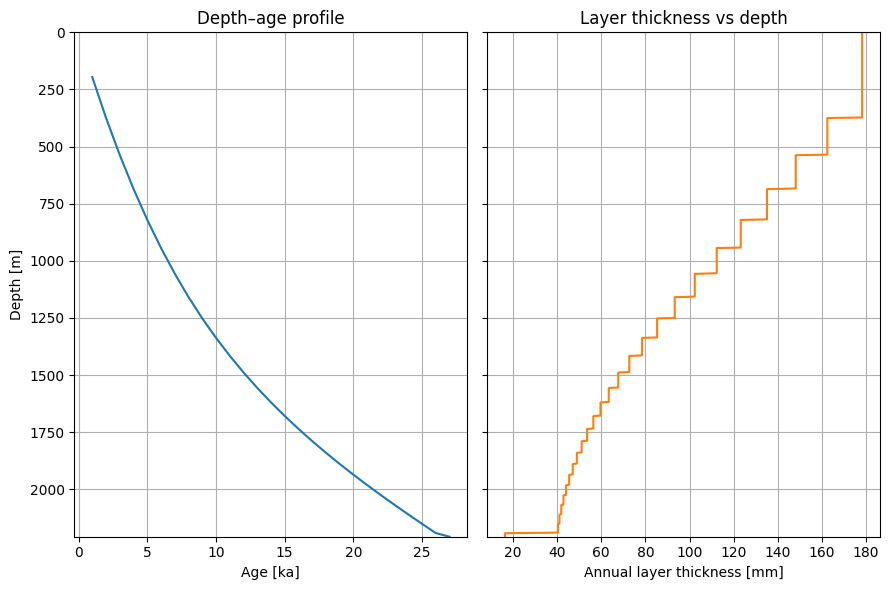

In [7]:
# ------------------------
# DJ-model
# ------------------------
#%matplotlib widget

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d
import matplotlib.colors as mcolors

from google.colab import output
output.enable_custom_widget_manager()

#---------------------------
# model parameters
# --------------------------
t_iso = 80000.0         # Maximum isochrone age [yr]
int_iso = 1000          # Isochrone interval [yr]
dt = 100.0              # Integration timestep [yr]
x_core = 100000.0       # Ice-core location along flowline [m]

# ---------------------------
# 1. Load  geometry
# ---------------------------
df = pd.read_csv("greenland_flowline.csv")
x_grid = df["x"].values
bed = df["bed"].values
surface = df["surface"].values
u_sur = df["u_sur"].values
H_grid = surface - bed

# Slopes for DJ velocity
dE_s_dx = np.gradient(surface, x_grid)
dE_b_dx = np.gradient(bed, x_grid)

# ---------------------------
# 2. Interpolation function
# ---------------------------
def interp_on_grid(arr, xpos):
    """Linear interpolation on uniform flowline grid."""
    return np.interp(xpos, x_grid, arr, left=arr[0], right=arr[-1])

# ---------------------------
# 3. Velocity field functions
# ---------------------------
def horizontal_velocity(xpos, z):
    """Horizontal velocity u(x,z)"""
    scalar_input = np.isscalar(xpos) or np.isscalar(z)
    xpos_a = np.atleast_1d(xpos)
    z_a = np.atleast_1d(z)

    u_s = interp_on_grid(u_sur, xpos_a)
    u_b = f_b * u_s
    H_local = interp_on_grid(H_grid, xpos_a)
    h_local = np.clip(h_kink, 1e-6, H_local)

    u = np.empty_like(z_a)
    mask_lower = z_a <= h_local
    mask_upper = ~mask_lower

    # Linear layer near bed
    if np.any(mask_lower):
        zm = z_a[mask_lower]
        u[mask_lower] = u_b[mask_lower] + (u_s[mask_lower] - u_b[mask_lower]) * (zm / h_local[mask_lower])
    # Plug flow above kink
    if np.any(mask_upper):
        u[mask_upper] = u_s[mask_upper]

    return u[0] if scalar_input else u

def vertical_velocity(xpos, z):
    """Vertical velocity w(x,z) (positive downward)."""
    scalar_input = np.isscalar(xpos) or np.isscalar(z)
    xpos_a = np.atleast_1d(xpos)
    z_a = np.atleast_1d(z)

    H_local = interp_on_grid(H_grid, xpos_a)
    h_local = np.minimum(h_kink, H_local)
    u_s = interp_on_grid(u_sur, xpos_a)
    slope_s = interp_on_grid(dE_s_dx, xpos_a)
    slope_b = interp_on_grid(dE_b_dx, xpos_a)

    w_bed = -m + f_b * u_s * slope_b
    w_sur = -b + u_s * slope_s
    denom = H_local - 0.5*h_local*(1.0 - f_b)
    alpha = (w_bed - w_sur)/np.where(denom==0,1e-12,denom)

    w = np.empty_like(z_a)
    mask_lower = z_a <= h_local
    mask_upper = ~mask_lower

    # Lower part (near bed)
    if np.any(mask_lower):
        zm = z_a[mask_lower]
        w[mask_lower] = w_bed[mask_lower] - alpha[mask_lower]*(f_b*zm + (zm**2)/(2*h_local[mask_lower])*(1-f_b))
    # Upper part (plug layer)
    if np.any(mask_upper):
        z_u = z_a[mask_upper]
        w[mask_upper] = w_sur[mask_upper] + alpha[mask_upper]*(H_local[mask_upper]-z_u)

    # Enforce downward flow only
    w[w>0] = 0
    return w[0] if scalar_input else w

# ---------------------------
# 4. RK4 integration step
# ---------------------------
def rk4_step_vec(x, z, dt):
    """Vectorized RK4 advection step for multiple particles."""
    u1, w1 = horizontal_velocity(x,z), vertical_velocity(x,z)
    x1, z1 = x + 0.5*dt*u1, z + 0.5*dt*w1
    u2, w2 = horizontal_velocity(x1,z1), vertical_velocity(x1,z1)
    x2, z2 = x + 0.5*dt*u2, z + 0.5*dt*w2
    u3, w3 = horizontal_velocity(x2,z2), vertical_velocity(x2,z2)
    x3, z3 = x + dt*u3, z + dt*w3
    u4, w4 = horizontal_velocity(x3,z3), vertical_velocity(x3,z3)

    dx = dt/6 * (u1 + 2*u2 + 2*u3 + u4)
    dz = dt/6 * (w1 + 2*w2 + 2*w3 + w4)
    return x + dx, z + dz

# ---------------------------
# 5. Initialize and advect isochrones
# ---------------------------
isochrone_age = np.arange(-t_iso,0,int_iso)
isochrone_z = []  # heights above bed
isochrone_x = []

N = 1
for t in np.arange(-t_iso,0,dt):
    if np.isin(t, isochrone_age):
        # new isochrone at surface
        isochrone_z.append(H_grid.copy())
        isochrone_x.append(x_grid.copy())
        N += 1

    # Advect all existing isochrones
    for i in range(N-1):
        xnew, znew = rk4_step_vec(isochrone_x[i], isochrone_z[i], dt)
        xnew[xnew>x_grid[-1]] = np.nan  # clip beyond flowline
        # Clip z to remain within ice
        znew = np.clip(znew, 0, H_grid)
        isochrone_x[i] = xnew
        isochrone_z[i] = znew

# ---------------------------
# 6. Plot isochrones along flowline
# ---------------------------
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x_grid/1000, surface, color='gray', label='Surface', linewidth=3)
ax.plot(x_grid/1000, bed, 'k', label='Bed', linewidth=5)

# --- color mapping for ages ---
norm = mcolors.Normalize(vmin=0, vmax=t_iso)
cmap = cm.viridis_r

for i, age in enumerate(np.linspace(0, t_iso, len(isochrone_x))):
    color = cmap(norm(age))
    ax.plot(
        isochrone_x[i]/1000,
        isochrone_z[i] + interp_on_grid(bed, isochrone_x[i]),
        color=color
    )

ax.axvline(x_core/1000, color='r', linestyle='--', label='Ice-core site')
ax.set_xlabel("Distance [km]")
ax.set_ylabel("Elevation [m a.s.l.]")
ax.set_title("Isochrones along flowline")

# --- parameter legend box ---
param_text = (
    f"$h_{{kink}}$ = {h_kink:.0f} m\n"
    f"$b$ = {b:.2f} m yr⁻¹\n"
    f"$m$ = {m:.2f} m yr⁻¹\n"
    f"$f_b$ = {f_b:.2f}"
)
ax.text(
    0.97, 0.97, param_text,
    transform=ax.transAxes,
    ha='right', va='top',
    fontsize=10, family='monospace',
    bbox=dict(boxstyle="round,pad=0.4", facecolor="white", alpha=0.7, edgecolor="gray")
)

# --- colorbar for age ---
sm = cm.ScalarMappable(norm=norm, cmap=cm.viridis)
cbar = fig.colorbar(
    sm,
    ax=ax,
    orientation='horizontal',
    fraction=0.046, pad=0.1, aspect=30
)
cbar.set_label("Isochrone age [kyr BP]")
cbar.set_ticks(np.linspace(0, t_iso, 6))
cbar.set_ticklabels([f"{t/1000:.0f}" for t in np.linspace(0, t_iso, 6)])
plt.tight_layout()
plt.show()

# ---------------------------
# 7. Depth–age profile at ice-core site
# ---------------------------
j_core = np.argmin(np.abs(x_grid - x_core))
H_core = surface[j_core] - bed[j_core]

# Depth of each isochrone below surface
iso_depths_core = H_core - np.array([z[j_core] for z in isochrone_z])
iso_ages_core = np.array([-age for age in isochrone_age])

# Remove NaNs and duplicates
mask_valid = np.isfinite(iso_depths_core)
iso_depths_core = iso_depths_core[mask_valid]
iso_ages_core = iso_ages_core[mask_valid]
depths_unique, idx_unique = np.unique(iso_depths_core[::-1], return_index=True)
idx_unique = len(iso_depths_core) - 1 - idx_unique  # convert back to original indices
ages_unique = iso_ages_core[idx_unique]

#depths_unique, idx_unique = np.unique(iso_depths_core, return_index=True)
ages_unique = iso_ages_core[idx_unique]

# Build interpolation
interp_func = interp1d(depths_unique, ages_unique, kind='linear', fill_value="extrapolate")

# Evaluate on uniform depth grid
depth_grid = np.arange(0, round(H_core))
age_profile = interp_func(depth_grid)

# ---------------------------
# 8. Annual layer thickness vs depth
# ---------------------------

# Compute annual layer thickness (lda)
dage = np.gradient(age_profile)  # [yr/m]
layer_thickness = 1.0 / np.where(dage == 0, np.nan, dage)  # [m/yr]

# Convert to mm/yr for better readability
layer_thickness_mm = layer_thickness * 1000.0

# Create side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(9, 6), sharey=True)

# --- (a) Depth–age profile ---
axs[0].plot(ages_unique / 1000, depths_unique, color='C0')
axs[0].set_xlabel("Age [ka]")
axs[0].set_ylabel("Depth [m]")
axs[0].set_ylim([H_core, 0])
axs[0].set_title("Depth–age profile")
axs[0].grid(True)

# --- (b) Annual layer thickness ---
axs[1].plot(layer_thickness_mm, depth_grid, color='C1')
axs[1].set_xlabel("Annual layer thickness [mm]")
axs[1].set_title("Layer thickness vs depth")
axs[1].grid(True)

plt.tight_layout()
plt.show()

### *Solution Exercise 4)*

4a) *Describe and show with an example how accumulation rate, basal melt rate, basal sliding fraction and vertical strain rate profile (kink height) affect the age-depth profile. What is another important control on the isochrone shape?*

These parameters can influence the age-depth profile in different ways.

Firstly, if the accumulation rate is high, as it can be in Greenland, annual layers will be very thick when formed, meaning that deeper layers are required to access older ages. In this case, the age-depth curve will grow slowly and gradually. Conversely, if the accumulation rate is low, as in a rather arid but cold site, the annual layer will be very thin, thus requiring a shallower depth to reach older ages.

Furthermore, a relatively high bed fusion rate, as can be found in a temperate glacier, will remove the oldest layer of ice, thereby flattening the curve at greater depths.

The basal slip fraction exhibits a dynamic in which, if it is low, the ice will tend to deform internally, causing a rather steep curve as vertical compression will result in thin, ancient layers at greater depths. If, on the other hand, the basal slip fraction is high, the ice will slide and deform less significantly, thus causing a more progressive curve as the layers will remain thicker at greater depths, possibly resulting in a younger age at a given depth.

In terms of the vertical deformation rate profile, if kink height is high, then the column will deform significantly and produce a very steep curve. If, alternatively, it is low, then the deformation will be less and the ice will be younger even at greater depths, then becoming older closer to the ice base.

Another important control on the isochron shape could be the past dynamics and climate of the glacier, as variations in these parameters over the years can lead to misinterpretations.



4b) *If you want to drill an ice core with a high temporal resolution, what are the most important parameters to consider when selecting the drill site? What should you consider if you want to recover a record that extends as far back in time as possible? Describe, where in the world you would expect to find such conditions.*

To drill an ice core, the criteria to consider are generally: intact stratigraphy, ice thickness, low surface melting, ice flow and upstream effects, and depth-age relationship.

If a high-resolution ice core is required, the most important parameters to consider when choosing a drilling site are therefore intact stratigraphy, since if the layer is deformed it will no longer be possible to distinguish the age at certain depths, so deformation must be minimal (i.e., usually near an ice divide). In addition, a sufficiently high accumulation rate is needed to distinguish different temporalities, as thicker annual layers result in younger ice even at great depths. Surface melting must be minimal or non-existent, as meltwater can infiltrate into the glacier and transfer chemical and thermal signals that can alter the recorded chronology. Finally, ice flow and upstream effects must also be minimal, as high ice flow over a non-continuous topography can cause glacier deformation sufficient to preclude temporal interpretation. These conditions are likely to be found in Greenland, as the accumulation rate is usually high, while melting and deformation of the ice are minimal.

If, on the other hand, the aim is to recover a record covering as far back in time as possible, a significant ice thickness must be considered, since the higher it is, the more temporal information is potentially available, unless basal melt rate is high. Furthermore, low accumulation is better so that the annual layers are thin, and an ancient age can be reached at moderate depths. These conditions are possible in areas of Antarctica which are very cold, have low accumulation and significant ice thicknesses with a stable flow.


4c) *In the model below, we assume that accumulation rate, basal melt rate, basal sliding fraction, and kink height are constant both along the profile and through time. In a few sentences, discuss when and where this assumption could be reasonable for establishing a depth–age relationship, and under what conditions it would break down.*

This assumption could be reasonable for establishing depth-age relationships near an ice divide, as there is no significant horizontal deformation, but rather vertical deformation, resulting in more stable (i.e., constant) accumulation rates, basal melt rates, basal sliding fractions, and kink heights. This implies an intact stratigraphy allowing relatively accurate inferences about depth-age relationships.

However, this assumption is compromised in situations where the flow is fast or near the margins, where horizontal deformation is more pronounced, preventing accurate estimation of depth-age relationships, as age is not consistently related to depth. Furthermore, where basal melting is significant and variable, the deeper layers are removed, reducing the effectiveness of the model with constant parameters. Similarly, if the accumulation rate has varied significantly in the past, then the model is no longer representative with constant parameters, distorting the depth-age relationship.

4d) *Ice cores are often drilled on ice divides, where horizontal flow is minimal. Drawing on your discussion in question (c), explain how conditions differ in fast-flowing regions (e.g. at EastGRIP with surface velocities of ~55m/yr) and what consequences this has for interpreting climate-proxy records.*


Based on discussion in question (c), conditions are different in regions with fast flow (e.g., EastGRIP with surface velocities of ~55 m/year).

In fact, significant horizontal ice transport occurs, suggesting record is not a representative local archive, as ice originates from upstream areas with different climatic conditions. Furthermore, horizontal deformation causes also thinning of the deep layers, worsening the temporal resolution. In addition, greater internal deformation and basal sliding cause the stratigraphy to lose integrity, as the isochrones are tilted relative to the ice divide.

These conditions therefore lead to an unreliable interpretation of local conditions, greater uncertainty for deep layers, and a discontinuous archive, causing climate change to be misinterpreted (e.g., natural variability vs glacial dynamics).



References:

Dansgaard, W., & Johnsen, S. J. (1969). A Flow Model and a Time Scale for the Ice Core from Camp Century, Greenland. Journal of Glaciology, 8(53), 215–223. doi:10.3189/S0022143000031208


Gerber, T. A., Hvidberg, C. S., Rasmussen, S. O., Franke, S., Sinnl, G., Grinsted, A., Jansen, D., and Dahl-Jensen, D.: Upstream flow effects revealed in the EastGRIP ice core using Monte Carlo inversion of a two-dimensional ice-flow model, The Cryosphere, 15, 3655–3679, https://doi.org/10.5194/tc-15-3655-2021, 2021.